### Linear Regression using Statsmodels

#### Housing Price Prediction Problem

##### What is linear regression?

***Linear regression is a model that predicts proportionality between independent and dependent variables.***

<img src="img/1.png">

In [3]:
!pip install statsmodels

##### Predicting Housing prices using Statsmodels

Link: https://fred.stlouisfed.org

Location : ./dataset/

* fed_funds.csv
* unemployment.csv
* gdp.csv
* monthly-hpi.csv
* shiller.csv


**Main Data Dictionary**



* housing_price_index - Measures the price changes of residential housing - TARGET(https://fred.stlouisfed.org/series/USSTHPI)


* date


* season - winter, summer, fall


* gross_domestic_product - When gdp will increase then hpi will also increase
(https://fred.stlouisfed.org/series/GDP)


* total_expenditure - total govt. spending ( https://fred.stlouisfed.org/series/W068RCQ027SBEA)

    When total_expenditure increases then hpi will also increase
    

* producer_price_index


* total_unemployed


* long_interest rate


* consumer_price_index

### Import Libraries

In [4]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

sns.set_style('darkgrid')

/Users/vipulgaur/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/vipulgaur/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
housing_price_index = pd.read_csv('dataset/monthly-hpi.csv')

uemp = pd.read_csv('dataset/unemployment-macro.csv')

federal_funds_rate = pd.read_csv('dataset/fed_funds.csv')

gdp = pd.read_csv('dataset/gdp.csv')

shiller = pd.read_csv('dataset/shiller.csv')

In [6]:
housing_price_index.head()

,date,housing_price_index
0,2010-11-01,186.07
1,2010-12-01,183.27
2,2011-01-01,181.35
3,2011-02-01,179.66
4,2011-03-01,178.84


In [7]:
uemp.head()

,date,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers
0,2010-11-01,16.9,8696,2531,6708,5.7,63.0
1,2010-12-01,16.6,8549,2609,6899,6.4,61.2
2,2011-01-01,16.2,8393,2800,6816,6.5,60.1
3,2011-02-01,16.0,8175,2730,6741,6.4,60.2
4,2011-03-01,15.9,8166,2434,6735,6.4,60.3


In [8]:
shiller.head()

,date,sp500,consumer_price_index,long_interest_rate
0,2010-11-01,1198.89,218.80,2.76
1,2010-12-01,1241.53,219.18,3.29
2,2011-01-01,1282.62,220.22,3.39
3,2011-02-01,1321.12,221.31,3.58
4,2011-03-01,1304.49,223.47,3.41


In [9]:
gdp.head()

,date,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,5766.7,64.2,192.7,14881.3
1,2011-04-01,5870.8,64.2,203.1,14989.6
2,2011-07-01,5802.6,64.0,204.6,15021.1
3,2011-10-01,5812.9,64.1,201.1,15190.3
4,2012-01-01,5765.7,63.7,200.7,15291.0


In [10]:
federal_funds_rate.head()

,date,federal_funds_rate
0,2010-11-01,0.19
1,2010-12-01,0.18
2,2011-01-01,0.17
3,2011-02-01,0.16
4,2011-03-01,0.14


In [11]:
df = (shiller.merge(housing_price_index,on='date')
      .merge(gdp,on='date')
      .merge(federal_funds_rate,on='date')
      .merge(uemp,on='date')
     )

In [12]:
df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product,federal_funds_rate,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers
0,2011-01-01,1282.62,220.22,3.39,181.35,5766.7,64.2,192.7,14881.3,0.17,16.2,8393,2800,6816,6.5,60.1
1,2011-04-01,1331.51,224.91,3.46,180.80,5870.8,64.2,203.1,14989.6,0.10,16.1,8016,2466,6823,6.8,59.4
2,2011-07-01,1325.19,225.92,3.00,184.25,5802.6,64.0,204.6,15021.1,0.07,15.9,8177,2785,6850,6.8,59.2
3,2011-10-01,1207.22,226.42,2.15,181.51,5812.9,64.1,201.1,15190.3,0.07,15.8,7802,2555,6917,8.0,57.9
4,2012-01-01,1300.58,226.66,1.97,179.13,5765.7,63.7,200.7,15291.0,0.08,15.2,7433,2809,7022,7.4,57.1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 16 columns):
date                              23 non-null object
sp500                             23 non-null float64
consumer_price_index              23 non-null float64
long_interest_rate                23 non-null float64
housing_price_index               23 non-null float64
total_expenditures                23 non-null float64
labor_force_pr                    23 non-null float64
producer_price_index              23 non-null float64
gross_domestic_product            23 non-null float64
federal_funds_rate                23 non-null float64
total_unemployed                  23 non-null float64
more_than_15_weeks                23 non-null int64
not_in_labor_searched_for_work    23 non-null int64
multi_jobs                        23 non-null int64
leavers                           23 non-null float64
losers                            23 non-null float64
dtypes: float64(12), int64(3), object(1)

#### Target Variable >>> housing_price_index

### Ordinary Least Squares (OLS)

###### OLS - corresponds to minimizing the sum of squared differences between actual and observed values

### Assumptions of OLS


1. Linearity - There is a linear relationship between feature and target variables.


2. No Multicollinearity - relationship between 2 independent variables


3. Zero conditional mean - Average distance between observations and the best fit line is zero


4. Homoskedasticity - No pattern in residuals. Variance is constant


5. No Autocorrelation - A variable is not correlated to itself


#### All these assumptions must be satisfied before we use linear regression.

### Simple Linear Regression

**Using OLS we'll create our model setting housing_price_index as a function of total_unemployed**

In [15]:
housing_model = ols('housing_price_index ~ total_unemployed',data=df).fit()

In [17]:
housing_model_summary = housing_model.summary()

In [18]:
housing_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.952
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                     413.2
Date:                 Sun, 02 Aug 2020   Prob (F-statistic):           2.71e-15
Time:                         09:53:54   Log-Likelihood:                -65.450
No. Observations:                   23   AIC:                             134.9
Df Residuals:                       21   BIC:                             137.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          313.3128      5.408     57.938      0.000     302.067     324.559
total_unemployed    -8.3324      0.410    -20.327      0.000      -9.185      -7.480
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.552
Skew:                           0.294   Prob(JB):                        0.759
Kurtosis:                       2.521   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation


* Adj R-Squared - 0.949 which means that around 95% of housing prices can be explained by our variables.


* Regression Coeff - (coef) - Represent the change in dependent variable wrt 1 unit change in independent variable


* Standard Error (std err) - Accuracy of the coefficient of total_unemployed by estimating the variation in coefficient if it were run on a different sample. std err of total_unemployed in 0.41 which is pretty low which means good accuracy.


* p-value - significance of independent variables.
            0 for total_unemployed and 0 for intercept
            
    * Defines significance of independent variables
    * if p-val < 0.05 then variable is significant
         
* confidence interval - 

    * We can be 95% confident that our total_unemployed will between -9.185	and -7.480.
  

* Durbin-Watson - Test for Autocorrelation - 1.126
    
    * H0 - No first order autocorrelation
    * H1 - first order autocorrelation exists
    
    * Values of DW test range from 0 to 4:
        
        * 2 is no autocorrelation
        * 0 to < 2 is positive autocorrelation (more common in Time series data)
        * .>2 to 4 is negative autocorrelation (less common in time series data)

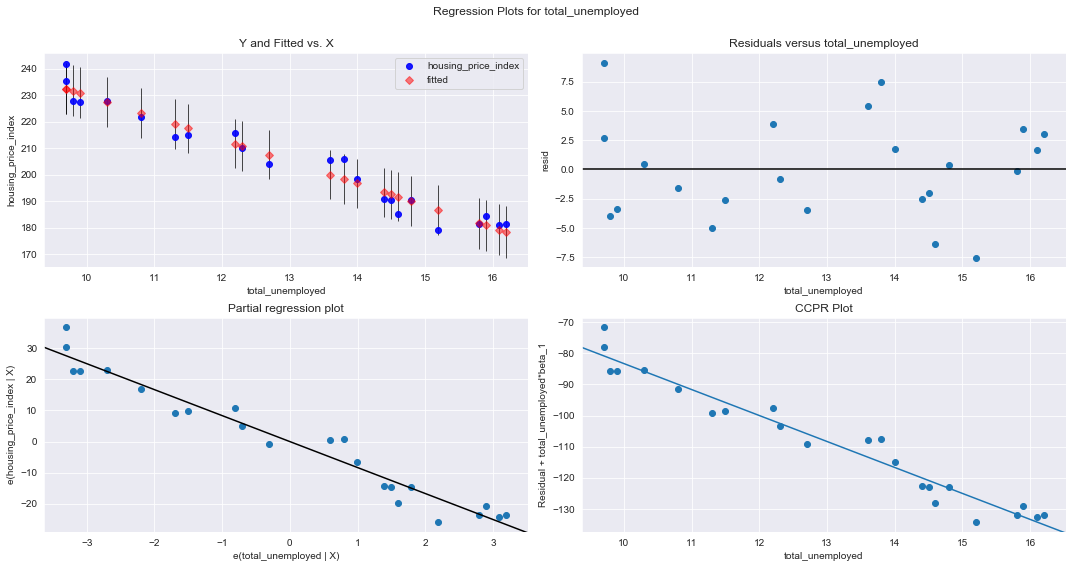

In [20]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(housing_model,'total_unemployed',fig=fig)

* **Y and Fitted vs X** : plots dependent variable against predicted values in a confidence interval.


* **Residuals vs total_unemployed** : Model errors vs the predictor variable (t_u). If you don't see a pattern between the dots across the mean line then the assumption of homoskedasticity holds.


* **Partial Regression Plot** : relationship between x and y and mainly shows the impact of other variables


* **CCPR** - Component Plus Component vs Residual - Extension of Partial Regression Plot. It shows where our trend line will lie after other independent variables are added.

### Multiple Linear Regression

In [21]:
housing_model_2 = ols("""housing_price_index ~ total_unemployed
                                               + long_interest_rate
                                               + federal_funds_rate
                                               + consumer_price_index
                                               + gross_domestic_product""",data=df).fit()

In [22]:
hpi_summary = housing_model_2.summary()

In [ ]:
hpi_summary